# Create Clusters Using AgglomerativeClustering Algorithm On Customer_Credit Dataset

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

C:\ProgramData\Anaconda3\envs\tf2.9\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load The Dataset

In [2]:
df = pd.read_csv('./CC GENERAL.csv')

In [3]:
df 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Missing Values

In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
impute=SimpleImputer(missing_values=np.nan, strategy='mean')

In [7]:
df_new=impute.fit_transform(df[['MINIMUM_PAYMENTS','CREDIT_LIMIT']])

In [8]:
df_new=pd.DataFrame(df_new,columns=['MINIMUM_PAYMENTS','CREDIT_LIMIT'])

In [9]:
df_new

,MINIMUM_PAYMENTS,CREDIT_LIMIT
0,139.509787,1000.0
1,1072.340217,7000.0
2,627.284787,7500.0
3,864.206542,7500.0
4,244.791237,1200.0
...,...,...
8945,48.886365,1000.0
8946,864.206542,1000.0
8947,82.418369,1000.0
8948,55.755628,500.0


## Drop The Unnecessary Features

In [10]:
df.drop(['MINIMUM_PAYMENTS','CREDIT_LIMIT','CUST_ID'],axis=1,inplace=True)

## Create Dataset Without missing values and Unnecessary Features

In [11]:
df = pd.concat([df,df_new],axis=1)

In [12]:
col=df.columns

## Scale The Values Of The Dataset

In [13]:
scale=StandardScaler()
data=scale.fit_transform(df)

In [14]:
minmax=MinMaxScaler()
data=minmax.fit_transform(data)

In [15]:
df = pd.DataFrame(data,columns=col)

In [16]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS,CREDIT_LIMIT
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.003979,0.000000,1.0,0.001826,0.031720
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.080893,0.222222,1.0,0.014034,0.232053
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.012264,0.000000,1.0,0.008210,0.248748
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.000000,0.000000,1.0,0.011310,0.248748
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.013374,0.000000,1.0,0.003204,0.038397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.006419,0.500000,0.0,0.000640,0.031720
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.005439,0.000000,0.0,0.011310,0.031720
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.001602,0.250000,0.0,0.001078,0.031720
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.001036,0.250000,0.0,0.000729,0.015025


## Statistics 

In [17]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS,CREDIT_LIMIT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.082154,0.877271,0.020457,0.014534,0.018270,0.020766,0.490351,0.202458,0.364437,0.090096,0.026413,0.041089,0.034170,0.153715,0.919553,0.011310,0.148396
std,0.109306,0.236904,0.043570,0.040722,0.040193,0.044491,0.401371,0.298336,0.397448,0.133414,0.055485,0.069435,0.057078,0.292499,0.223055,0.030503,0.121490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006736,0.888889,0.000808,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.007556,0.000000,1.000000,0.002236,0.051753
50%,0.045864,1.000000,0.007367,0.000932,0.003956,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.016894,0.000000,1.000000,0.004392,0.098497
75%,0.107868,1.000000,0.022637,0.014166,0.020828,0.023629,0.916667,0.300000,0.750000,0.148148,0.032520,0.047486,0.037482,0.142857,1.000000,0.011310,0.215359
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Reduction And Plot The Scree Graph

In [18]:
pca=PCA(n_components=17)
p=pca.fit_transform(df)

In [19]:
x=range(1,18)
y=pca.explained_variance_ratio_

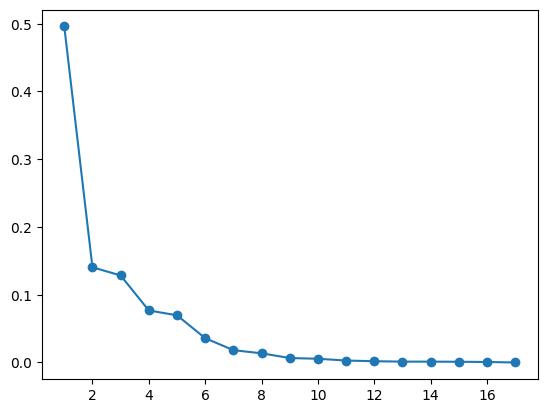

In [20]:
plt.plot(x,y,marker='o')

## Feature Reduction

In [21]:
pca=PCA(n_components=2)
p=pca.fit_transform(df)

In [22]:
df = pd.DataFrame(p,columns=['X','Y'])

In [23]:
df

,X,Y
0,-0.482164,-0.097656
1,-0.608577,-0.019379
2,0.304507,0.920946
3,-0.588622,-0.005605
4,-0.554354,0.052965
...,...,...
8945,0.646921,-0.463044
8946,0.549893,-0.406711
8947,0.360389,-0.422647
8948,-0.646095,-0.204332


<AxesSubplot: xlabel='X', ylabel='Y'>

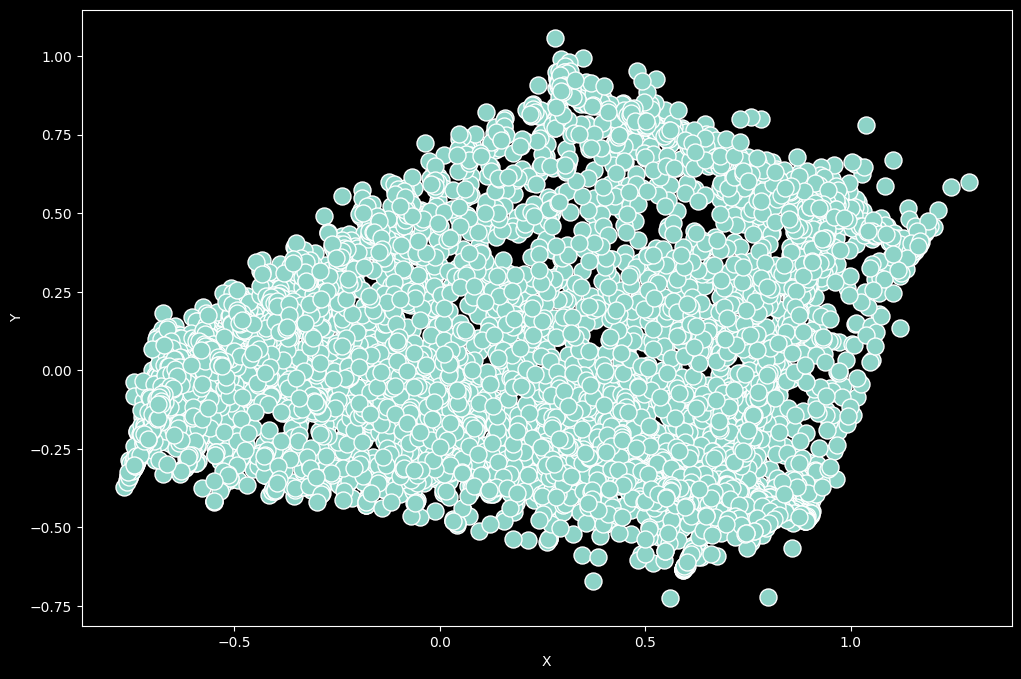

In [24]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.scatterplot(x='X',y='Y',data=df,s=150)

## Plot The Dendogram

In [25]:
linkage_data=linkage(df,'average')

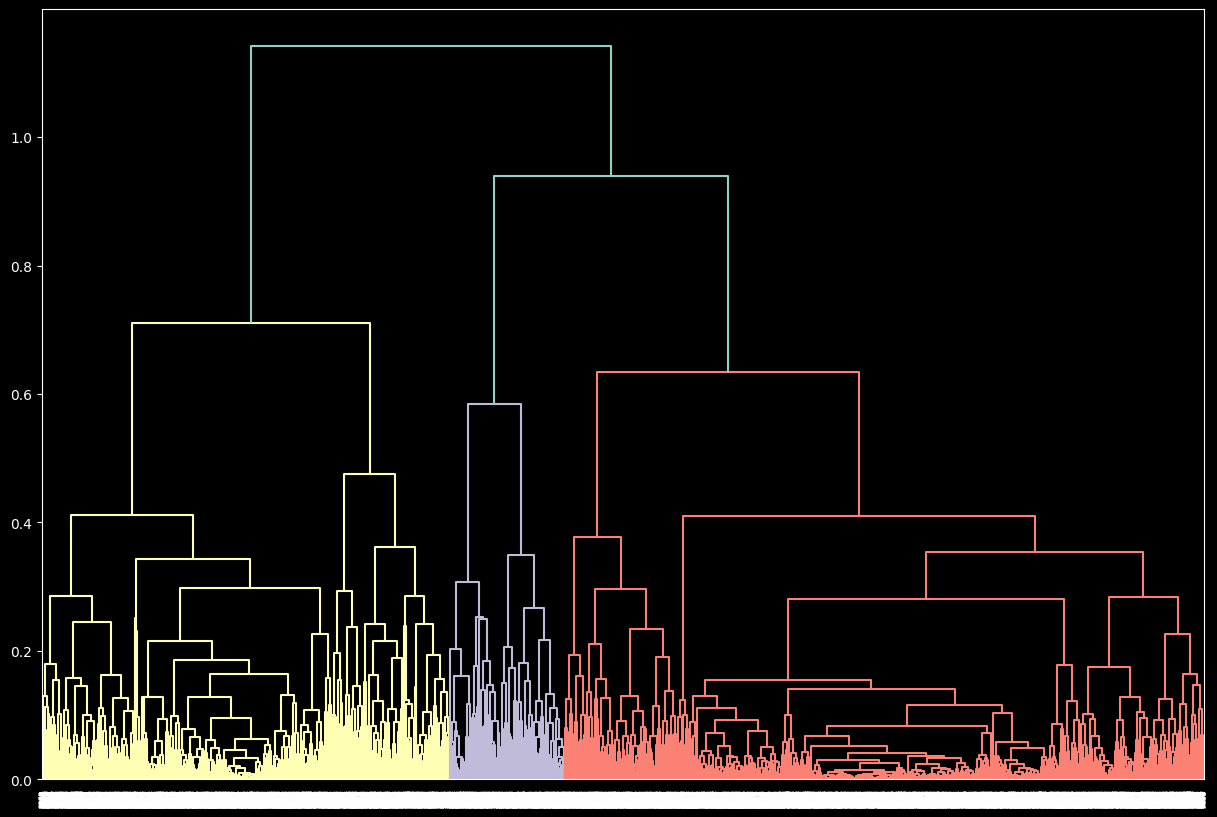

In [26]:
plt.figure(figsize=(15,10))
dendrogram(linkage_data,labels=df.index)
plt.show()

## Apply AgglomerativeClustering

In [27]:
cluster=AgglomerativeClustering(n_clusters=3)
df['Label']=cluster.fit_predict(df)

<AxesSubplot: xlabel='X', ylabel='Y'>

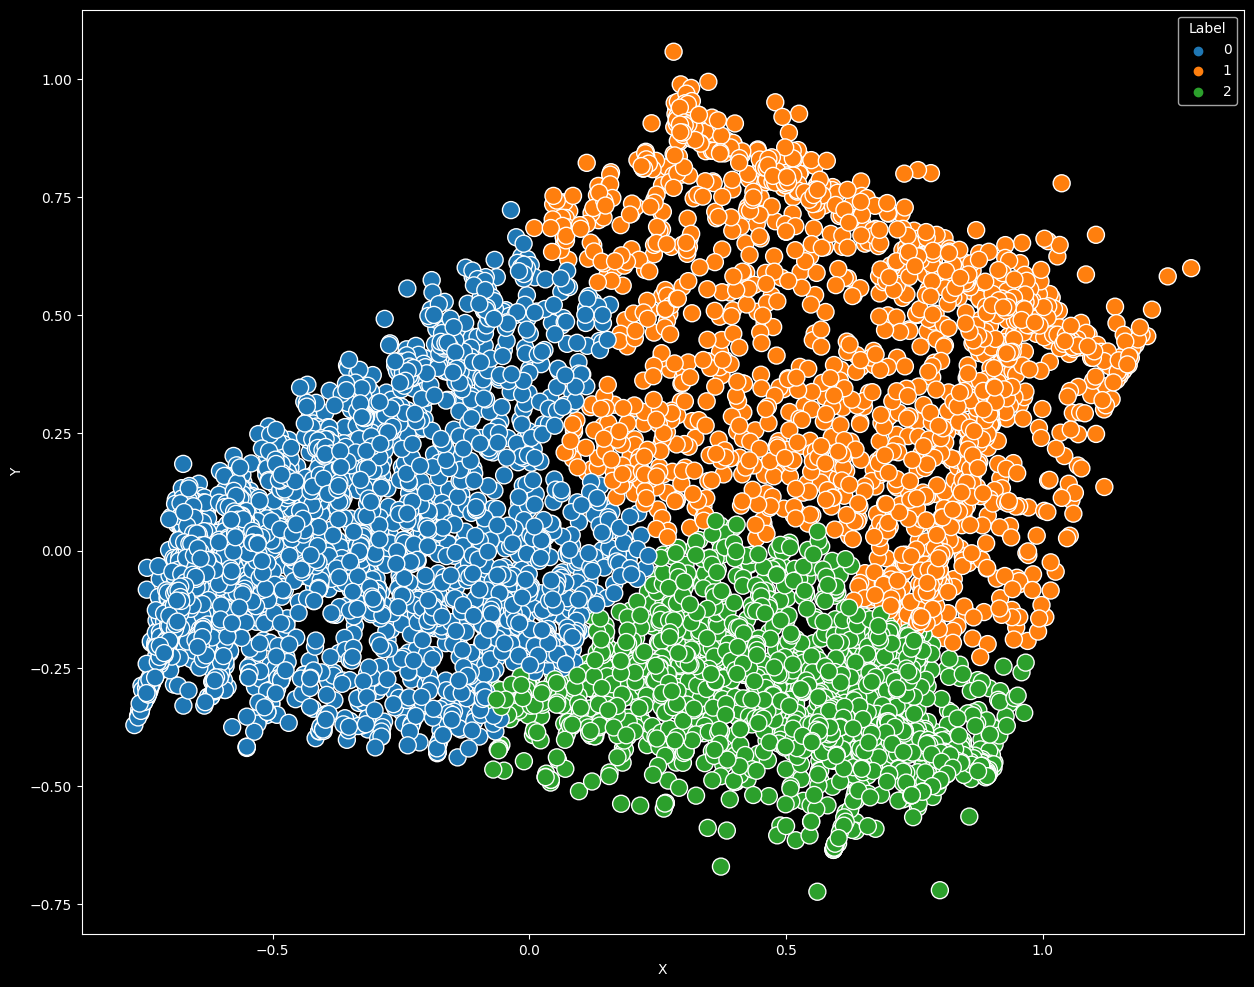

In [28]:
plt.style.use('dark_background')
plt.figure(figsize=(15,12))
sns.scatterplot(x='X',y='Y',data=df,hue='Label',s=150,palette='tab10')